# Module 19

### 19.5.2  Logistic Regression Vs. a Basic Neural Network
For her first comparison, Beks will look at logistic regression and the basic neural network.


A logistic regression model is a classification algorithm that can analyze continuous and categorical variables. Using a combination of input variables, logistic regression predicts the probability of the input data belonging to one of two groups. 

If the probability is above a predetermined cutoff, the sample is assigned to the first group, otherwise it is assigned to the second. 

For example, using an applicant's personal information (such as age and income), logistic regression could be used by a bank to determine if a person does or does not qualify for a credit card.

At the heart of the logistic regression model is the sigmoid curve, which is used to produce the probability (between 0 and 1) of the input data belonging to the first group. This sigmoid curve is the exact same curve used in the sigmoid activation function of a neural network. 

In fact, a basic neural network using the sigmoid activation function is effectively a logistic regression model:

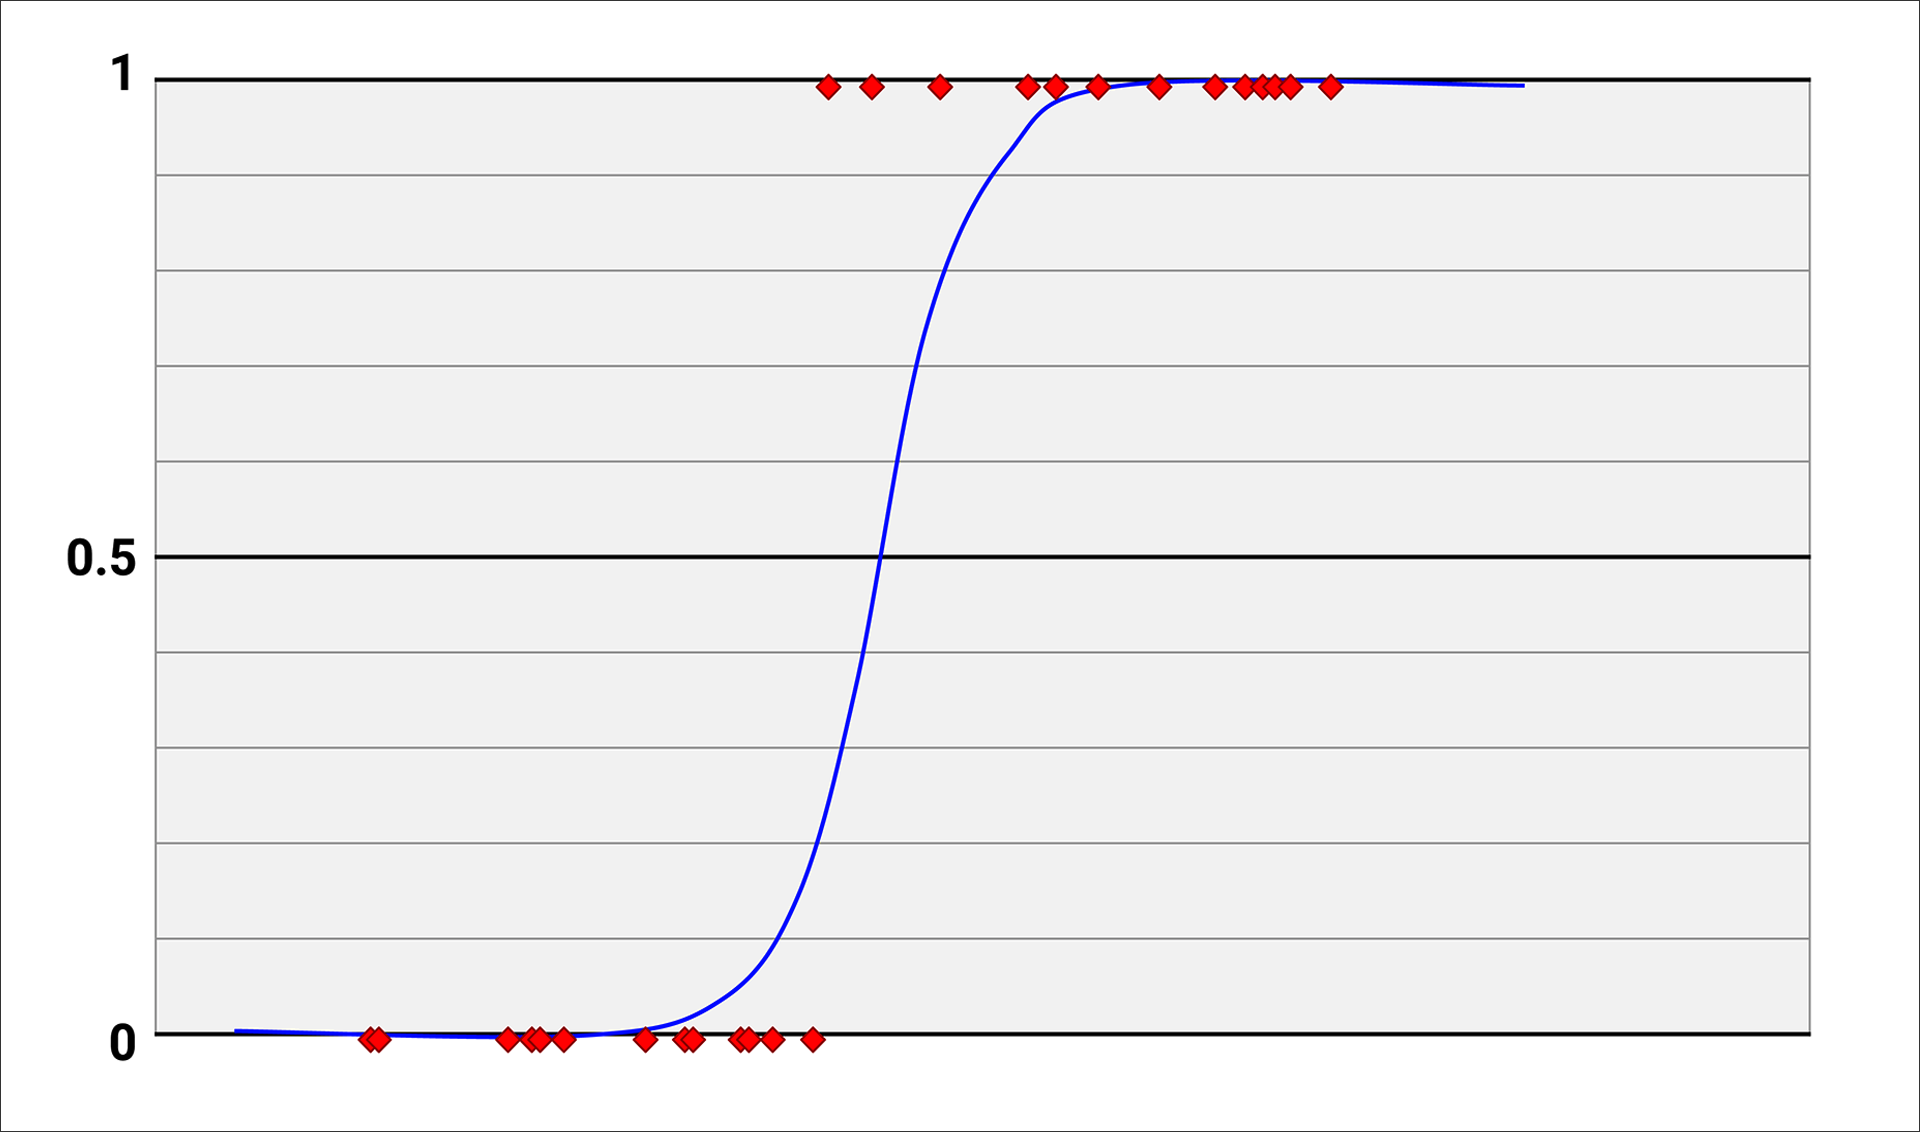
The S-shaped sigmoid curve produces a probability between 0 and 1.

To demonstrate how similar the logistic regression and basic neural network models are in terms of performance, we’ll build and evaluate both models using the same training/testing dataset. 

First, we’ll start by downloading this diabetes dataset (diabetes.csv)Preview the documentand placing it in a folder with a new Jupyter Notebook. 

Next, we’ll make a new Jupyter Notebook and name it “LogisticRegression_NeuralNet” (or something similar) to help us easily locate the comparison example at another time. 

Once we have created our notebook and placed the dataset into the corresponding folder, we’ll start by importing our libraries and reading in the dataset. Copy and run the following code into the notebook:


In [1]:

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Import our input dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The DataFrame shows nine columns of diabetes data: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and Outcome.

This dataset is from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) and contains the patient information of 786 women. It is used as a real-world practice dataset to build a predictive diagnostic model. Since there are only 786 data points across eight features, this dataset is well suited for a logistic regression model, but still large enough to build a neural network model. Now that we have our dataset loaded into Pandas, we need to prepare the data to train both models. With our logistic regression model, there is no preprocessing or scaling required for the data. However, our basic neural network needs the numerical variables standardized. Therefore, we’ll need to keep track of a scaled and unscaled training dataset such that both models have the correct input data in their preferred formats. To split the data, we need to add and run the following code:


In [2]:

# Remove diabetes outcome target from features data
y = diabetes_df.Outcome
X = diabetes_df.drop(columns="Outcome")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


Next, we need to standardize the numerical variables using Scikit-learn’s StandardScaler class. To standardize our data, we need to add and run the following code:



In [3]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


Now we’re ready to train and evaluate our models. We’ll first start with our logistic regression model.

**REWIND**
Logistic regression models can be built using Scikit-learn’s LogisticRegression class in the linear_model module.
For our purposes, we’ll use our basic logistic regression parameters, which include:

- The solver parameter is set to 'lbfgs', which is an algorithm for learning and optimization. 
- The particular solver isn’t very important in this example, but note that a number of optimizers exist.
- The max_iter parameter will be set to 200 iterations, which will give the model sufficient opportunity to converge on effective weights

Putting all of our arguments together, we’ll add and run the following code in the notebook:



In [4]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")


 Logistic regression model accuracy: 0.729


Next, we need to build, compile, and evaluate our basic neural network model. Again, we’ll use our typical binary classifier parameters:

Our single hidden layer will have an input_dim equal to 8, 16 neuron units, and will use the relu activation function.
The loss function should be binary_crossentropy, using the adam optimizer.
Our model should provide the additional accuracy scoring metric and train over a maximum of 50 epochs.

**NOTE**
Compared to the 200 training iterations for our logistic regression model, we’ll only train our neural network model through 50 epochs—this will limit the risk of overfitting our model.

Again, we need to add and run the following code in our notebooks:


In [5]:
X_train_scaled
X_train
import numpy as np
#np.array(y_train)

In [6]:
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, np.array(y_train), epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,np.array(y_test),verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Train on 576 samples
Epoch 1/100
576/576 [==============================] - 1s 1ms/sample - loss: 0.7077 - accuracy: 0.5920
Epoch 2/100
576/576 [==============================] - 0s 41us/sample - loss: 0.6716 - accuracy: 0.6545
Epoch 3/100
576/576 [==============================] - 0s 45us/sample - loss: 0.6387 - accuracy: 0.6771
Epoch 4/100
576/576 [==============================] - 0s 52us/sample - loss: 0.6139 - accuracy: 0.6858
Epoch 5/100
576/576 [==============================] - 0s 49us/sample - loss: 0.5921 - accuracy: 0.7066
Epoch 6/100
576/576 [==============================] - 0s 55us/sample - loss: 0.5730 - accuracy: 0.7205
Epoch 7/100
576/576 [==============================] - 0s 61us/sample - loss: 0.5577 - accuracy: 0.7274
Epoch 8/100
576/576 [==============================] - 0s 59us/sample - loss: 0.5448 - accuracy: 0.7309
Epoch 9/100
576/576 [==============================] - 0s 58us/sample - loss: 0.5331 - accuracy: 0.7344
Epoch 10/100
576/576 [======================

576/576 [==============================] - 0s 54us/sample - loss: 0.4260 - accuracy: 0.8003
Epoch 79/100
576/576 [==============================] - 0s 49us/sample - loss: 0.4256 - accuracy: 0.8003
Epoch 80/100
576/576 [==============================] - 0s 47us/sample - loss: 0.4253 - accuracy: 0.8003
Epoch 81/100
576/576 [==============================] - 0s 45us/sample - loss: 0.4250 - accuracy: 0.7986
Epoch 82/100
576/576 [==============================] - 0s 43us/sample - loss: 0.4252 - accuracy: 0.8003
Epoch 83/100
576/576 [==============================] - 0s 44us/sample - loss: 0.4245 - accuracy: 0.7986
Epoch 84/100
576/576 [==============================] - 0s 42us/sample - loss: 0.4246 - accuracy: 0.8003
Epoch 85/100
576/576 [==============================] - 0s 43us/sample - loss: 0.4240 - accuracy: 0.8003
Epoch 86/100
576/576 [==============================] - 0s 43us/sample - loss: 0.4240 - accuracy: 0.8003
Epoch 87/100
576/576 [==============================] - 0s 45us/samp

If we compare both model’s predictive accuracy, their output is very similar. Either model was able to predict whether or not a patient is diagnosed with diabetes more than 70% of the time.

Question 1
What are possible reasons that both models could not achieve 80% predictive accuracy? Select all that apply.
- The input data was insufficient—there were not enough data points and too few features.
- Both models are lacking optimization (parameters, structure, and weights).
- There are features in the input data that confuse the model.

Nice work! When a model does not meet your desired performance, it is a good idea to check the input data and parameters.

Beyond the performance of both models, there are a few other factors to consider when selecting a model for your data. First, neural networks are prone to overfitting and can be more difficult to train than a straightforward logistic regression model. 

Therefore, if you are trying to build a classifier with limited data points (typically fewer than a thousand data points), or if your dataset has only a few features, neural networks may be overcomplicated. 

Additionally, **logistic regression** models are easier to dissect and interpret than their neural network counterparts, which tends to put more traditional data scientists and non-data experts at ease. 

In contrast, **neural networks** (and especially deep neural networks) thrive in large datasets. Datasets with thousands of data points, or datasets with complex features, may overwhelm the logistic regression model, while a deep learning model can evaluate every interaction within and across neurons. 

Therefore, the decision between using a logistic regression model and basic neural network model is nuanced and, in most cases, a matter of preference for the data scientist.